---

# Assignment 3 - Algorithms in computational biology (INFO-F438)
## Variations on the longest common subsequence problem

Name : Roman Lešický 

Matricule : 000608972

Version : Python 3.12.8 | packaged by conda-forge

"I coded everything myself and answered all questions without the use of AI."

---

# Libraries

In [1]:
import random # Package that is required for the random generation of DNA strings for the examples 

import time # Required package for doing the Time analysis 

import tracemalloc # https://docs.python.org/3/library/tracemalloc.html 
                   # For space complexity analysis, I would like to use this package to track the memory allocation. 
                   # I plan on tracking the memory usage with different inputs sized and from that approximate the space complexity.

import matplotlib.pyplot as plt # For the different plotting done in this assignment 

from matplotlib.lines import Line2D # This is to have better legends in the graphics 

---

# The Algorithm :

*Your task is to code the MLMLCS function*

## Initial logic for this assignment :

According to my understanding of the assignment, we have to implement a modified version of the Longest Common Subsequences (LCS) problem. 

Thus, I initially started from the textbook to find the correct logic for the LCS and fortunately enough pseudocode for the LCS problem, which serves as a foundation for the minimum length match LCS (MLMLCS) problem.

To be precise I based my logic on the § 6.5 section of the textbook, where I used this specific pseudocode (Figure 1 & 2) as the foundation for the `mlmlcs()` function [1]. Additionally, I also used Stanford's CS161 (Design and Analysis of Algorithms) lecture 13 [2] about dynamic programming as additional ressource, so when "slides" are referenced in the comments of the code these are directly referencing specific slides in that lecture. 

Figure 1 :

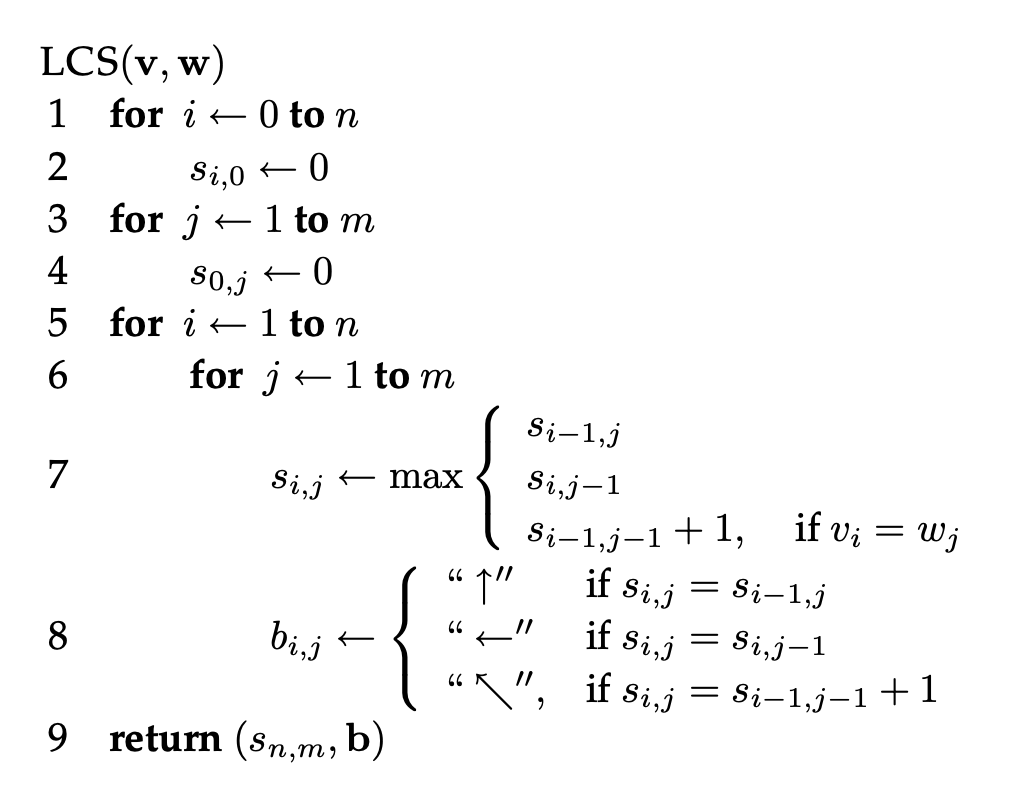

Description of Figure 1 :

*According to the textbook [1], the method that is being used for solving this problem is Dynamic Programming. Essentially, this means that we breakdown the problem into smaller subsections where we avoid recomputing redundant computations. Here in the context of the LCS problem, the sub-problem are the prefixes `v[1, ...,i]` and `w[1, ... , j]`, where the overall goal is to build up the solution from smaller prefixes using recurrence. Here the solutions are being store in `s[i][j]`table where each sub-problem is solved only once. Here lines $1-4$ in the pseudo-code initialize the dynamic programming table `s[i][j]` where the rows and columns are set to 0. Afterwards, in lines $4-7$ the `s` table is filled for each pair `(i,j)` using recurrence where deletions / insertions / matches are taken into account. Then line $8$ set the backtracking pointer `b[i][j]` based on where the maximum came from (↑ arrow /  ← arrow /  ↖ arrow ). And finally, in line $9$ here the code should return the final LCS length `s[n][m]` and the backtracking table `b`.*

Figure 2 :

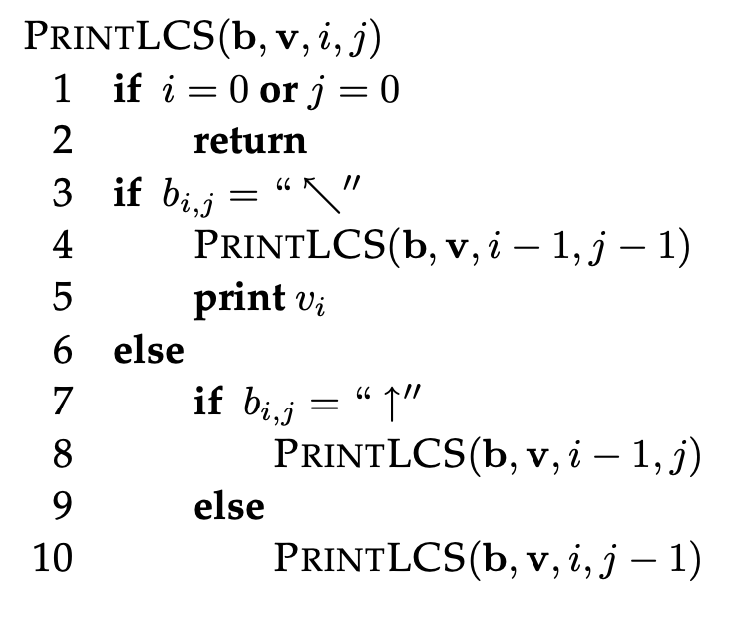

Description of Figure 2 :

*Here, this is the pseudocode for the "accompanying" function, which allows the reconstruction and actual print of LCS string. This is done by walking back through the backtracking of the `b[i][j]` table. Here the pseudo-code delivers different if statements for different printing according to what match / deletion / insertion we have. Here in lines $1-2$ we have the "default" case of the recurrence `if` we have either `i == 0` or `j == 0` we are at the edge and no characters are left so the code returns directly. Here in lines $3-5$ here we take into account the "↖ arrow" scenario meaning that we have a $match$ of characters which has been found meaning that we have a `v[i] == w[j]` so we recurse diagonally meaning `(i - 1 , j - 1)` and then we print `v[i]` because it does belong to the LCS. Then the remainder of the pseudo-code ( lines $6-10$) treats the non-diagonal scenario, here we have two cases : the `if` `b[i][j] == ↑ arrow` we move up meaning that the recurrence needs to be done with `(i - 1, j)` meaning that we skip a character from `v`, `else` this means that we in the  `← arrow` scnenario we move to the left and we recurse with `(i , j - 1 )` meaning that we skip a character from `w`*

(Sorry if these images are too big)

(If the .png files are not shown properly here LCS Textbook.png corresponds to the `LCS(v, w)` pseudo-code at page 176 and Print LCS Textbook.png to the `PRINTLCS(b, v, i, j)` also at page 176 of the textbook)

According to the informations in [1] and especially [2], the general logic which is employed for the LCS problem is based on :

- An **2-dimensional dynamic programming table** (`C[i][j]`, these are the notations from the Stanford lecture which I also used) which stores the prefixes `A[0, ..., i - 1]` and `B[0, ..., j - 1]`. 

- Alongside a **recurrence relation** where we determine `C[i][j]` based on the previously computed by `C[i][j] = C[i-1][j-1] + 1` $if$ A[i-1] == B[j-1] match and in contrary by `C[i][j] = max(C[i-1][j], C[i][j-1])` $if$ A[i-1] != B[j-1] (do not match). 

- With the use of **backtracking** is also employed where pointers are used to trace back the path from `C[N][M]` to reconstruct the LCS string, where as said before in Figure 2 a diagonal move corresponds to a matched character. 


## Adapted Logic from the Standard LCS Problem to the MLMLCS Version

Essentially, the dynamic programming approach can be kept but needs to be modified with some additions to take into account the different constraints of the MLMLCS version of this problem. These contraints are :

- The resulting sequence which will be outputted by the code $S$ needs to be concatenating consecutive valid blocks $(s_1, s_2, \dots, s_l)$

- Each block $s_i$ must be a length of at least $k$ (called `k_minimal_size_for_s` in the code down)

- Matches which are shorter than $k$ needs to be ignored meaning that they should not directly contribute to the length 

Here are detailed the modifications which need to be taken into account to correctly implement the MLMLCS problem based on the LCS logic :

### 1. Adaptation of the Dynamic Programming Table `C[i][j]`:

Concerning the two-dimensional dynamic programming tables (`C[i][j]`) they are also used just like in the standard LCS but with a modified meaning :


- In the standard LCS : `C[i][j]` stores the optimal LCS length (counting individual character matches) for the prefixes `A[0, ... ,i - 1]` and `B[0, ... ,j - 1]`

- When it comes to the MLMLCS adaptation:  `C[i][j]` now represents the total length (sum of lengths of valid blocks) of the optimal MLMLCS for the prefixes `A[0, ... ,i - 1]` and `B[0, ... ,j - 1]`.
 Here, each counted match must appear as part of a valid consecutive block of length at least $k$ 


### 2. Addition of a new tables called `consecutive_matched_lengths[i][j]` :

This new tables serves as an auxiliary called `consecutive_matched_lengths[i][j]`, this is something which does not appear in the standard version of the LCS but is required in the MLMLCS adaptation.

- Since in MLMLCS, we must track the length of consecutive matches ending at positions `A[i-1]` and `B[j-1]`. This information is critical for identifying valid blocks of consecutive matches.

- Functionality: 

    - When characters match `A[i-1] = B[j-1]`, the consecutive match length at `[i][j]` increments by one from `[i-1][j-1]`
  
    - $If$ the characters do not match, the value resets to 0, effectively terminating the current block

Thus, the information stored in `consecutive_matched_lengths[i][j]` directly informs the modified recurrence relation, allowing it to determine if a valid consecutive block $length >= k$ has been formed.

### 3. Modified Recurrence Relation for MLMLCS

Here we also use **recurrence** relation used to fill the DP table in the standard form of the LCS but its adapted to the constraints of this version.

- Firstly, lets start about the "Skipping scenario", which can remain and unchanged from the standard LCS meaning :
  
  `[C[i][j] = max(C[i-1][j], C[i][j-1])`

  Where the backtracking pointers `b[i][j]` are "positioned" accordingly to the recorded $"UP"$ or $"LEFT"$ moves

- Secondly for the "matched (Match) scenario", here the logic is quite different to faithful to the constraints :

  - So the code starts by retrieving the length $L$ of the current consecutive match from `consecutive_matched_lengths[i][j]`

  - Then it evaluates whether this match length $L$ satisfies the constraint $length >= k$

  - $if$ and only if a valid block is found, the code will calculate the potential optimal score considering the full block:

    \[
    `\text{score_using_block} = C[i-L][j-L] + L`
    \]

  - Accordingly, the DP table `C[i][j]` is then updated if this block's inclusion yields a higher score than the skipping scenario :
    
    - essentially $if$ `score_using_block` > `C[i][j]`, then:

      -  `C[i][j] = \text{score\_using\_block})`
      - The backtracking pointer is set to `"BLOCK:L"`

This sort of adaptation ensures that the MLMLCS optimal score incorporates valid blocks, correctly satisfying the constraint of consecutive substrings with minimum  $length >= k$

### 4. Adapted Backtracking Procedure for MLMLCS

And finally the **backtracking** method has also been specifically modified for MLMLCS to take into account the constraints regarding the consecutive blocks :

- So upon the encountering a pointer labeled `"BLOCK:L"` during backtracking, the algorithm will do a multitude of things:

  - 1. It will recognizes a valid block of length $L$ as part of the optimal solution.
  - 2. Then it extracts this block substring from string $A$ as `A[i-L:i]` (this substring is identical in string $B$)
  - 3. Then it adds this substring to the beginning of the resulting MLMLCS string:
    \[
    `result = block_substring + result`
    \]

  - 4. This results in a diagonal move which moves back by the entire block length $L$ , continuing from cell $(i-L,\, j-L)$.

This backtracking mechanism significantly diverges from classical LCS backtracking, where each diagonal step corresponds to a single matched character. In MLMLCS, diagonal moves are by entire block lengths, thus ensuring proper reconstruction of consecutive valid blocks as determined during the forward DP pass.



# Code for the implantation of the `mlmlcs()` function using the logic described above :

In [ ]:
def mlmlcs(string_A, string_B, k_minimal_size_for_s):
    """
    Here is the main function which allows to find the Minimum Length Match Longest Common Subsequence (MLMLCS) between two DNA strings. 
    This function will mirror the function in Figure 1, here we take into account the constraints specified by the assignment for the
    MLMLCS problem.
    
    Input :
    
    -  string_A: which is the first string composed of only A / C / G / T bases (DNA)
    -  string_B: which is the second string also composed of only A / C / G / T bases (DNA)
    -  k_minimal_size_for_s : this corresponds to "k" which essentially is the 
    
    Output  
    
    -  Here the function will return `result` which is a capital S string, which corresponds to the longest subsequence satisfying all constraints.
        This specific strand is composed of the different blocks si (lowercase s's) so that each appear consecutively in both inputted strings A and B, and are 
        the at least k characters long. 
        
    I will not enter too much into detail since there is an entire section dedicated to the time and space complexity but I am still doing a mini-overview of both.

    Time Complexity: 
    
    Here the overall time complexity is estimated to be about O(N * M) where: 
         
        N = len(string_A) 
        M = len(string_B)
        
        - Initialization Phase (DP Tables): O(N*M) because of the creation of the three N*M tables
        - Table Filling Phase (the main DP Loop): O(N*M), since here we do O(1) x time work per cell for N*M cells
        - Backtracking Phase: O(N+M) for the path traversal + string operations
        - Visualization: O(N+M) to call the mlmlcs_visualisation
    
    Space Complexity: 
    
    Here the overall time complexity is estimated to be about O(N * M) where:
        
        - DP Tables: O(N*M) because of the three tables which dominate the space usage
        - Backtracking Variables: O(N+M) since we store the result string and block infos 
        - Visualization: O(N+M) for the auxiliary table space in the mlmlcs_visualisation
        
    Overall, the algorithm is dominated with an O(N * M) for time and space complexity due to the DP tables
    les
    """
    
    # Code to get the lengths of the two DNA strings, which are required for the ranges in the for loops to create the tables 
    len_A = len(string_A)  
    len_B = len(string_B)  
    

### Initialization : 
    
    # Here this is the how we represent the main DP tables in the code (lik in he standard LCS logic), this is directly from the pseudocode in slides 21-22 [2]
    # As a remainder C[i,j] will stores the length of the optimal MLMLCS for each subproblem
    
    C = []  # here we initialize the list to hold the tables 
    
    for i in range(len_A + 1):  
        # This is the first for loop, which will create a row for each character in A, plus one for empty string this outer loop runs N + 1 times.
        # Here the +1 is added so that the code will create a table of size (len_A+1) × (len_B+1) which includes the empty string which "models" the base case situation 
        # This way index 0 represents an empty string, while indices from 1 to len_A can represent prefixes of increasing length, this way we respect the constraint 
        # of the MLMLCS to be between A[0...i-1] and B[0...j-1] 
        
        row = [] # here we create the aforementioned row
    
        for j in range(len_B + 1):  
            # Here we have the inner for loop, here we create a column for each character in B, plus one for empty string (the +1), this inner loop runs M + 1 times.
            # So the overall, "work" produced by this two loops which are nested is O(N * M) more details in the Runtime analysis part.
            
            row.append(0)  # here we append 0, so that we initialize all the values for 0 (for now) meaning that initially we have 0 matching characters
        C.append(row)  # here we just append the rows to the C table, 

    # Here this is the code which will implement the additional table needed for the MLMLCS variation `consecutive_match_lengths`. 
    # As a remainder this table tracks how many consecutive characters match ending at each position, this way we can identify blocks 
    # of matching matching characters that appear consecutively in both strings. 
    # in term of code this can be done with consecutive_match_lengths[i,j] = length of matching substring ending at A[i-1] and B[j-1]

    # Here the same code logic is also used for the Initialization of this additional table, so the same time and space complexity applies 
     
    consecutive_match_lengths = []  
    
    for i in range(len_A + 1): # for the rows
        row = []  # initialize empty list for the rows 
        
        for j in range(len_B + 1): # for the columns 
            row.append(0)  
        
        consecutive_match_lengths.append(row) 
    
    # And for the final initialization step in this algorithm, here we create a back backtracking pointers which follows the same logic as the textbook.
    # This code's structure is adapted from the slides 24-33 [2], it also has the same time and space complexity just like the previous tables. 
    # This backtracking table will store informations about which "choice"  led to the optimal solution at each cell. The primary use of this table is to 
    # later on reconstruct the MLMLCS after filling the tables, this is done with the "UP", "LEFT", or "BLOCK:length" directions for block matches.
    
    b = [] 
    
    for i in range(len_A + 1): # for the rows
        row = []  # initialize empty list for the rows 
        
        for j in range(len_B + 1): # for the columns 
            row.append("NONE")  # here we do initialize zero's but NONE's which indicate that no decision has been yet done 
    
        b.append(row)  
        
    # So in this section the 3 required tables were formed :
    
    # 1. C to stores the length of the optimal MLMLCS for each subproblem
    # 2. consecutive_match_lengths to tracks consecutive character matches
    # 3. b to stores backtracking information to reconstruct the solution         
    
### Filling these tables : 

    # Here in this section the tables which were just created will be filled using a DP approach just like described in [1] and [2],
    # where the algorithm will calculate the MLMLCS length.
    
    # This is done by iterating through each position in both strings and build our solution incrementally
    
    for i in range(1, len_A + 1):  # As again this loop has a O(N) time since it runs runs N times
        for j in range(1, len_B + 1):  # In the same way here this for loop has a O(M) time since it runs runs M times
            
            # Since we need to consecutive match lengths, here we first update the consecutive match length ending at this position. 
            # This approach ensures that we can find blocks of consecutive matching characters, this adresses the "consecutive substrings" requirement
            
            
            if string_A[i-1] == string_B[j-1]: # if statement to check if characters at current positions match, this takes O(1) time since its a character comparison
                
                # if the characters do match at current positions, the code will will extend the consecutive match consecutive_match_lengths,
                # by adding +1 to the to the previous diagonal value. This builds a running count of how many
                # characters have matched consecutively up to this position, helping us identify valid blocks.
                
                consecutive_match_lengths[i][j] = consecutive_match_lengths[i-1][j-1] + 1  
                
            else:
                # else, meaning that we are in the case scenario where the characters don't match so logically there is no consecutive sequence that is possible 
                # at this position so we reset the consecutive match length to 0 
                consecutive_match_lengths[i][j] = 0  
            
            # Here we come back to a standard recurrence seen in the LCS where we consider skipping characters, this is done to convey the idea of DP where 
            # we chose the optimal subproblem by deciding whether to skip A[i-1] or B[j-1] by taking the maximum value between C[i-1][j] (skip A's character) 
            # and C[i][j-1] (skip B's character). This is achieved by doing C[i,j] = max(C[i-1,j], C[i,j-1])
        
            if C[i-1][j] >= C[i][j-1]:  # so here we compare the result of skipping A[i-1] vs skipping B[j-1]
                # Essentially if skipping A[i-1] gives a better or equal result we chose to take this value 
                C[i][j] = C[i-1][j]  
                b[i][j] = "UP"
                
            else:
                # However, if skipping B[j-1] gives a better result we chose to take this value
                C[i][j] = C[i][j-1]  
                b[i][j] = "LEFT"  
            
            
            # Here a very important modification occurs from the standard LCS, since we can only consider blocks of consecutive matches with length >= k. 
            # The following if statement will determine precisely this. 
            
            length_current_consecutive_match = consecutive_match_lengths[i][j]  
            # here we determine the length of current consecutive match, required to see if length >= k_minimal_size_for_s (k)
            
            if length_current_consecutive_match >= k_minimal_size_for_s:  
                # if length >= k_minimal_size_for_s (k) meaning that we have a valid block we consider using the entire block for the solution,
                # otherwise we keep the score which was calculated above (the two if/else above which have a more traditional LCS approach )
                
                # if we have a valid block we need to find where it started 
                # this is done with i_before_block and j_before_block point to positions before this block began
        
                i_before_block = i - length_current_consecutive_match  
                j_before_block = j - length_current_consecutive_match  
                
                # We first get the optimal MLMLCS length before this block, which represents the best solution we could have before starting this "new" block
                score_before_block = C[i_before_block][j_before_block]  
                
                # Then we calculate the score for this specific "new" block, essentially here this is the same concept as adding +1 in the LCS but here instead
                # we're adding the length of the entire "new" block
                
                score_using_block = score_before_block + length_current_consecutive_match  
                
                # If using this "new" block gives a better result than the score calculate above (I am referring to the two if/else's just like before)
                # update our solution to use this "new" block instead 
                
                if score_using_block > C[i][j]:  # this is where the comparison happens, and if the solution is improved we use it otherwise we do not
                
                    C[i][j] = score_using_block  #  the updating of the solution 
                    
                    # We also need to store the informations about this "newer" block for backtracking, this is done with the "BLOCK:Length" 
                    b[i][j] = "BLOCK:" + str(length_current_consecutive_match)  
    
                # This is where the "logic" of the LCS(v,w) function seen in Figure 1 ends, the next chunk of code represents the backtracking which is something 
                # that in the pseudocode in the textbook [1] is handled via the separate PRINTLCS(b,v,i,j)function. I have decided to incorporate them both into 
                # the one mlmlcs() function. This might not be optimal but its a technical choice on my part to want to put everything under the same roof. 
                
### Backtracking to reconstruction the solution : 

    # So at this point in the code the tables are filled and ready to be used to reconstruct the solution via the use of backtracking. 
    # Just like its shown in pages 173/174 (also slides 33/34) a backtracking will happen from the bottom-right corner, guided by the "decisions" stored in table b.
    # This will reconstruct the sequence of blocks that form the MLMLCS.

    result = ""  # Here we are storing the final MLMLCS string
    blocks_info = []  # Here we will store informations about each block for visualization
    
    # Just like in the textbook we define i and j with len_A and B to start from bottom-right corner.
    # len_A and len_B since these variables stock the positions at the end of both of these strings/
    i = len_A  
    j = len_B  
    
    # while loop, which is the main "conductor" in this backtracking step where we want to continue until we reach the beginning of either string
    # Here the approximate time complexity is about O(N+M) at worst since we can can move at most N+M steps diagonally, up, or left
    
    while i > 0 and j > 0:  
        current_direction = b[i][j]  # Here we just check what decision was made at this specific position
        
        if current_direction == "UP":  
            # Just like in the standard LCS, if the current_direction is equal to "UP" we skipped a character from string A
            # This means that  A[i-1] is not part of the MLMLCS 
            # if this is the case we re-initialize i with -1 to move up one row (previous character in A)
            
            i = i - 1  
        
        elif current_direction == "LEFT":  
            # Here the logic is the same but for string B, where this elif enraptures the logic for when B[j-1] is not part of the MLMLCS
            # here we do the same thing that we did to i but to j, meaning -1 which means that we move left in the column (previous character in B)
            j = j - 1  
        
        elif current_direction.startswith("BLOCK:"):  
            # We need to take into account when we "stumble" on a block in the backtracking. This is done iwth the .startswith() method. 
            # Where if the string starts with a pointer "BLOCK:" we have stumbled upon a block to be included in our solution. 
            # This handles the constraint that S = s1,s2,...,sl.
            
            # Since in the code I am using the "BLOCK:Length" format as a pointer, to extract the relevant informations a splitting needs to be done.
            # The .split() method is used for that so we split at the :, and then we extract the length which needs to be converted into a int() so that it cane be used 
            
            block_parts = current_direction.split(":")  
            block_length = int(block_parts[1])  
            
            # And again we calculate where this block starts in both strings
            start_A = i - block_length  
            start_B = j - block_length  
            
            # Here we perform a slicing to extract the actual block substring from A, B could be also used but they are the same for this block so arbitrarily A is used. 
            # Since we are doing a slicing, which is not O(1) time complexity like the other comparaison / simple arithmetic / etc operations, 
            # this takes about O(block_length) time but in the worst case this takes O(N)
            block_substring = string_A[start_A:i] 
            
            # Now we just have to add the block to out result, its added a the beginning since we are moving backwards so we built the MLMLCS from right to left
            # This is literally S which is built by ""= s1,s2,...,sl" where each si is a block
            result = block_substring + result  #  this is a string concatenation which takes about O(block_length) time
            
            # Here we save the information, such as the start of A and B and the blocks' length so that it could be used for the visualisation
            block_info = [start_A, start_B, block_length]  
            blocks_info.append(block_info)  
            
            # Here instead of moving back by 1 like its shown at pages 173/174 we move back by the length of the entire block length
            # So we also move diagonally but by the entire block length
            
            i = i - block_length  # Move back in string A
            j = j - block_length  # Move back in string B
        
        else:
            # This was included just in case and as a general good practice rule of thumb, but I do not think that this scenario could happen, 
            # if and this is a big if the algorithm works correctly. 
            
            print(f"There was an error in the backtracking at positions : {i,j}")  
            break  
    
    # Since we are backtracking the list needs to be reserved this can be done using the .reverse() method, 
    # this way we get the infos about the blocks in the correct order.
    
    blocks_info.reverse() 
    
    # To try to mimic the visualisation seen in the assignment a separate visualisation function is created named "mlmlcs_visualisation"
    
    mlmlcs_visualisation(string_A, string_B, k_minimal_size_for_s, blocks_info)  
    # so a visualisation is directly provided when the mlmlcs() function is called upon 
    
    # And here is the final return which gives the reconstructed final MLMLCS string
    return result  

### Now for the visualisation function :

def mlmlcs_visualisation(string_A, string_B, k_value, blocks_info):
    """
    The only role of this function is to show how the MLMLCS matches align with the original strings, just like in the assignment, where we can see the MLMLCS 
    solution by marking the "matched" blocks in both original strings, showing that each block appears consecutively in both strings.

    Time Complexity: 
    
    Here the overall time complexity is estimated to be about O(N + M) where: 
         
        - String/List Creation: O(N+M) for the initialization of the alignment strings/lists
        - Block Filling: O(P) for the processing block info (P = total block length <= N+M)
        - String Joining/Printing: O(N+M) for the final string operations and output
    
    Overall what dominates in this code is about O(N + M), since its the table initialization and filling which is the dominant aspect of this code 
 
    Space Complexity: 
    
    Here the overall time complexity is estimated to be about O(N + M) where:
        
        - Alignment Representations: O(N+M) to store the lists/strings for visualization 
        
    And again here the overall space complexity is about O(N + M), dominated by the storing lists/strings for visualization
    
    """
    
# This code is ment to mimic the assignment :
    
    # So the first thing that should be displayed is the k value to show the minimum block length requirement
    print(f"k: {k_value}")  
    
    # Secondly, we print string A, this is the "original" first string inputted into the mlmlcs() function
    print(f"A: {string_A}")  

    # Here this next part shows the MLMLCS alignement for string A, essentially we want to show the blocks.
    # The way this is done here is that we create create a string of the same length as A and progresively 
    # the code will fill in characters only at positions that are part of the MLMLCS.
    
    alignment_A = ""  # empty string for A 
    
    for i in range(len(string_A)):  
        # adding empty spaces which correspond to the length of A 
        alignment_A = alignment_A + " "  
    
    # Here we chose to turn it into a list since characters are immutable, so converting it to a list makes 
    # to modify each position individually. This has a time and space of about O(N) since we are doing this for A.
    
    alignment_A_list = list(alignment_A) 
    
    # Now for the filling in of matched blocks for string A. Here this for loop will iterate 
    # through each block identified by the mlmlcs function
    for block in blocks_info:  
        
        # Here we extract the relavant informations 
        
        start_A = block[0]  # here we extract the starting positon of this specific block that we iterating through in string_A
        length = block[2]  # here we extract teh length of this same currently iterated block, its length will be >= k by default since we are dealing with blocks 
        
        # Here this following for loop iterates for each character in the currently iterated block and for all its length. 
        for index_within_block in range(length):
            
            # Here we calculate the absolute the characters index in the original string_A by adding the index_within_block
            # within the block to the block's starting position.
            position = start_A + index_within_block  
            
            # this if statement serves as a safety check to ensure that this calculated position is a valid index within string_A,
            # meaning that we do not go out of bound.
    
            if 0 <= position < len(string_A): 
                # if the position is okay, aka not out of bound we copy the character from the original string_A at that "position" into the corresponding "position"
                # in alignment_A_list (the visualisation list for A) which replaces it's space in this list so that it get printed.

                alignment_A_list[position] = string_A[position] 
    
    # And for easiness of printing we also reconvert it back to a string, and now we have a string called alignment_A
    # that shows exactly where MLMLCS blocks appear in A. This operation also has a O(N) time and space complexity.
    
    alignment_A = "".join(alignment_A_list)  
    
    # And we just print it 
    print(f"MLMLCS: {alignment_A}") # which also takes O(N) time 
    
    # This is the same code but just applied to B, so everything is the same except that we talk in O(M) and not O(N)
    
    print(f"B: {string_B}")  
    
    alignment_B = "" 
    
    for i in range(len(string_B)):  
        alignment_B = alignment_B + " " 
    
    alignment_B_list = list(alignment_B) 

    for block in blocks_info:  
        start_B = block[1]  
        length = block[2]  
        
        
        for index_within_block in range(length): 
            position = start_B + index_within_block  
            
            if 0 <= position < len(string_B): 
                alignment_B_list[position] = string_B[position]  
    
    alignment_B = "".join(alignment_B_list)  
    
    print(f"MLMLCS: {alignment_B}") 

""" 
Sidenote :

I am sorry if I repeat myself quite a lot, I just want to ensure the best understandability here and I do have a tendency for verbose when it comes to that.
"""

' \nSidenote :\n\nI am sorry if I repeat myself quite a lot, I just want to ensure the best understandability here and I do have a tendency for verbose when it comes to that.\n'

---

# Examples :


## Example 1:

Here two random strings will be generated with the function `make_random_dna(length_example)`, this code directly confirms the statement "You can
see that as k is increased, the length of the MLMLCS decreases until it becomes zero." since in all the cases after 3-4 or more iterations he MLMLCS decreases to nearly 0. 


In [20]:
# Required function which is an analog to `randomString` in the examples in the assignment 

def make_random_dna(length_example):
    """ 
    Function which serves to produce a random string of DNA, it required the random library since the .choice() 
    method is used to "Return a random element from the non-empty sequence seq" (https://docs.python.org/3/library/random.html). 
    The non-empty sequence seq is only composed of 4 letters corresponding to the DNA basis Adenosine / Cytosine / Guanine / Thymine.
    
    Input : 
    
    - length_example : an integer of the required length of the dna sequence used for the MLMLCS examples 
    
    Output :
    
    - final_dna_string : a string of length length_example composed of only a/c/g/t generated randomly 
    """
    
    dna_letters = ['a', 'c', 'g', 't'] # the list of DNA bases 
    
    # We first initialise an empty string which will get completed with the different bases 
    final_dna_string = ""
    
    # Simple for loop with a range which corresponds to length_example
    for i in range(length_example):
        
        # here we use the .choice method to chose at random which dna base will be added to the string final_dna_string
        random_letter = random.choice(dna_letters)
        
        # Here we add the chosen letter to the end of the string we are building
        final_dna_string = final_dna_string + random_letter
        
    # Return the desired length of a dna string 
    return final_dna_string


# Sorry of the code here does not look the best I tried the make the output look presentable 

A = make_random_dna(50)
B = make_random_dna(50)

longeur_A = len(f"string_A is : {A}")

print("\n" + "=" * longeur_A)
print("Example 1: Using two random strings :")
print(longeur_A * "=" + "\n")

print(f"string_A is : {A}")

print(f"string_B is : {B}" + "\n")

print(longeur_A * "=" + "\n")


# The mlmlcs code, here we will generate values from 1 to 8 for k like in the example 

print("Here is the MLMLCS for string_A and string_B in example 1 :")
print(" ")

for n in range(1,9):
    
    example_1_results = mlmlcs(A,B,n)
    print(" " * n)
    print(f" For a k value of {n} the result length of the MLMLCS is : {len(example_1_results)}") # Additional line in the MLMLCS analysis to really showcase the "You can see that as
                                                                                                  # k is increased, the length of the MLMLCS decreases until it becomes zero"
    print(longeur_A * "-" + "\n")
                                                                                                  



Example 1: Using two random strings :

string_A is : ggtcaaagtgacccccgatttgggcagcgcggattgccggtgattttttg
string_B is : tcgttcggtacttgattcgtcgtagcgtcaatccgcggccgagtaagtac


Here is the MLMLCS for string_A and string_B in example 1 :
 
k: 1
A: ggtcaaagtgacccccgatttgggcagcgcggattgccggtgattttttg
MLMLCS: g tc   gt ac    gatttgggca cgcg    gccggtga       
B: tcgttcggtacttgattcgtcgtagcgtcaatccgcggccgagtaagtac
MLMLCS:   g tc gtac  gatt  t g  g g ca   cgcggccg gt  g a 
 
 For a k value of 1 the result length of the MLMLCS is : 29
----------------------------------------------------------------

k: 2
A: ggtcaaagtgacccccgatttgggcagcgcggattgccggtgattttttg
MLMLCS:   tc   gt ac    gatt     agcgcg    gccggt         
B: tcgttcggtacttgattcgtcgtagcgtcaatccgcggccgagtaagtac
MLMLCS: tcgt     ac  gatt      agcg      cg  gccg gt      
  
 For a k value of 2 the result length of the MLMLCS is : 22
----------------------------------------------------------------

k: 3
A: ggtcaaagtgacccccgatttgggcagcgcggattgccg

---

## Example 2:

In this second example, we are meant to show that this method can isolate patterns that have been inserted into the initial strings (A and B). 

Here I have also inserted the "motif" (lack of a better word) so that both strings A and B have it inserted twice. 

This code also does support the statement "Notice that with $k = 1$ (standard LCS) the second aaaaaaa is not part of the LCS, but even having $k = 2$ the two $aaaaaaa$’s are part of the MLMLCS."


In [21]:
# same `make_random_dna` function 

def make_random_dna(length_example):
    """ 
    Function which serves to produce a random string of DNA, it required the random library since the .choice() 
    method is used to "Return a random element from the non-empty sequence seq" (https://docs.python.org/3/library/random.html). 
    The non-empty sequence seq is only composed of 4 letters corresponding to the DNA basis Adenosine / Cytosine / Guanine / Thymine.
    
    Input : 
    
    - length_example : an integer of the required length of the dna sequence used for the MLMLCS examples 
    
    Output :
    
    - final_dna_string : a string of length length_example composed of only a/c/g/t generated randomly 
    """
    
    dna_letters = ['a', 'c', 'g', 't'] # the list of DNA bases 
    
    # We first initialise an empty string which will get completed with the different bases 
    final_dna_string = ""
    
    # Simple for loop with a range which corresponds to length_example
    for i in range(length_example):
        
        # here we use the .choice method to chose at random which dna base will be added to the string final_dna_string
        random_letter = random.choice(dna_letters)
        
        # Here we add the chosen letter to the end of the string we are building
        final_dna_string = final_dna_string + random_letter
        
    # Return the desired length of a dna string 
    return final_dna_string


A = make_random_dna(50)
B = make_random_dna(50)

# Just like defined in the assignment : 
C = "aaaaaaa"
A = C + A[:25] + C + A[25:]
B = C + C + B

longeur_A = len(f"string_A is : {A}")

print("\n" + "=" * longeur_A)
print("Example 2: Using two random strings with an insterted 'motif' :")
print(longeur_A * "=" + "\n")

print(f"string_A is : {A}")

print(f"string_B is : {B}")

print(f"motif is : {C}" + "\n")

print(longeur_A * "=" + "\n")


# The mlmlcs code, here we will generate values from 1 to 6 for k like in the example 

print("Here is the MLMLCS for string_A and string_B in example 1 :")
print(" ")

for n in range(1,7): 
    
    example_1_results = mlmlcs(A,B,n)
    print(" " * n)
    print(f" For a k value of {n} the result length of the MLMLCS is : {len(example_1_results)}") 
                                                                                                  
    print(longeur_A * "-" + "\n")
                                            


Example 2: Using two random strings with an insterted 'motif' :

string_A is : aaaaaaaatgggcaactcatttacggtctgtgaaaaaaatgcagggcgacttacgactggaacc
string_B is : aaaaaaaaaaaaaatctaatgccagttgggagttttgaatgtaatagtttatttgctacgtggt
motif is : aaaaaaa


Here is the MLMLCS for string_A and string_B in example 1 :
 
k: 1
A: aaaaaaaatgggcaactcatttacggtctgtgaaaaaaatgcagggcgacttacgactggaacc
MLMLCS: aaaaaaaat   caac catt a  gt t tgaaaaaa tgc         tacg  tgg    
B: aaaaaaaaaaaaaatctaatgccagttgggagttttgaatgtaatagtttatttgctacgtggt
MLMLCS:       aaaaaaaatc aa  cca tt   agtt tgaa   aa a    a  tgctacgtgg 
 
 For a k value of 1 the result length of the MLMLCS is : 39
------------------------------------------------------------------------------

k: 2
A: aaaaaaaatgggcaactcatttacggtctgtgaaaaaaatgcagggcgacttacgactggaacc
MLMLCS: aaaaaaaa     aactcatt   gg  tgtg     aat  ag gc    tacg  tgg    
B: aaaaaaaaaaaaaatctaatgccagttgggagttttgaatgtaatagtttatttgctacgtggt
MLMLCS: aaaaaaaaaa     ct     ca ttgg      tg  tg 

---

## Example 3:

In the same spirit as example 2, it would be interesting to add a more biologically relevant sequence such as the Kozak sequence, which is the precise sequence of nucleotides which ribosomes search for so that they can dock unto it and produce a protein from the mRNA. According to *Hernández G, et al Trends Biochem Sci. 2019*  [3] the Kozak sequence is $(GCC)GCCRCCAUGG$ where R is a Purine base (here arbitrarily I have chosen gccgccaccaugg to be the "best" sequence). 

For this a wider range will be used to demonstrate how the MLMLCS adaptation of the LCS problem can be used as a tool for identifying conserved motifs in biological sequences, especially with the $k$ parameter serving as an adjustable "noise filter" that researchers can tune based on their specific needs.

This example is particularly interesting here since also according to *Hernández G, et al Trends Biochem Sci. 2019*, having variant which lack the critical G at position +4 (immediately after AUG) or a purine (A/G) at position -3 does reduce the binding capability of the ribosomes. So using the MLMLCS algorithm to detect the Kozak sequence variants with these reduce capabilities is interesting. 

Generally as $k$ increases 1 to 30 the distinct threshold points where the MLMLCS length decreases substantially:

- k = 1-8 : MLMLCS length remains stable at 85 nucleotides, so here capture both Kozak consensus and variant sequences along with surrounding regions

- k = 9-13 : Length drops to 77 nucleotides, at this k value there is a somewhat beginning of a filtering out of the shorter matching segments

- k = 14-16 : Further reduction to 65 nucleotides as the algorithm becomes more selective

- k = 17-23 : Length decreases to 49 nucleotides, in the same manner we decrease and the conserved regions become clearer 

- k = 24-26 : At this value there is a big reduction to just 26 nucleotides, isolating only the most highly conserved Kozak motif and perhaps one flanking base (length 25) 

- k = 27 to 30 : MLMLCS length becomes 0 (no block), indicating no regions meet this stringent conservation threshold 

So at low values the algorithm captures the entire Kozak sequences plus surrounding context (noise) but as we get to a optimal higher value of k (24-26).Essentially, the algorithm does highlight how the critical G at position +4 and the purine at position -3 are preserved in efficient Kozak sequences, while showing how variants lacking these critical nucleotides are filtered out at higher k values.


In [ ]:
def make_random_rna(length_example):
    """
    Function which serves to produce a random string of RNA. It requires the random library since the .choice()
    method is used to "Return a random element from the non-empty sequence seq" (https://docs.python.org/3/library/random.html).
    The non-empty sequence seq is only composed of 4 letters corresponding to the RNA bases Adenine, Cytosine, Guanine, and Uracil.
    
    Input:
        - length_example: an integer of the required length of the RNA sequence used for the MLMLCS examples
        
    Output:
        - final_rna_string: a string of length length_example composed of only a/c/g/u generated randomly
    """
    
    rna_letters = ['a', 'c', 'g', 'u']  # the list of RNA bases
    
    # We first initialize an empty string which will get completed with the different bases
    final_rna_string = ""
    
    # Simple for loop with a range which corresponds to length_example
    for i in range(length_example):
        # here we use the .choice method to choose at random which RNA base will be added to the string
        random_letter = random.choice(rna_letters)
        
        # Here we add the chosen letter to the end of the string we are building
        final_rna_string = final_rna_string + random_letter
    
    # Return the desired length of an RNA string
    return final_rna_string

# Here are some randomly generated RNA sequences using `make_random_rna`:

random_rna_seq1 = make_random_rna(30)
random_rna_seq2 = make_random_rna(30)
random_rna_seq3 = make_random_rna(30)

# Here we defined the Kozak consensus sequence and some variations :

kozak_consensus = "gccgccaccaugg"  # the "best" Kozak sequence

kozak_variant1 = "gccgccaccaugg"   # also the "best" Kozak sequence used as a variant for comparison reasons 

kozak_variant2 = "gccgccaccauga"   #  here is the first "real" variant with an "a" instead of "g" at position +4 corresponding to a Kozak with a reduced binding capability 

kozak_variant3 = "gcccccaccaugg"   # here is the second variant with an "c" instead of Purine at position -3 also corresponding to a Kozak with a reduced binding capability 
                                   
kozak_variant4 = "gcccccaccauga"   # here is variant with both of these positions changed, this variant should have a critically reduced binding capability

# Here we create our string A with the consensus and the variants
A = random_rna_seq1 + kozak_consensus + random_rna_seq2 + kozak_variant3 + random_rna_seq3

# Here we create the B string with the consensus BUT with some different variants
B = random_rna_seq1[:15] + kozak_consensus + random_rna_seq2[10:] + kozak_variant2 + random_rna_seq3[5:]

longeur_A = len(f"string_A is : {A}")
print("\n" + "=" * longeur_A)
print("Example 3: Biological relevance - Finding Kozak sequences in RNA")
print(longeur_A * "=" + "\n")

print(f"string_A is : {A}")
print(f"string_B is : {B}" + "\n")
print(f"Kozak consensus: {kozak_consensus}")
print(f"Variant with non-consensus +4 position (A instead of G): {kozak_variant2}")
print(f"Variant with non-consensus -3 position (C instead of purine): {kozak_variant3}" + "\n")


print(longeur_A * "=" + "\n")

# The mlmlcs code, testing different k values
print("Running MLMLCS with increasing k values for example 3:")
print(" ")

for n in range(1, 30):
    example_3_results = mlmlcs(A, B, n)
    print(" " * n)
    print(f"For k value of {n}, MLMLCS length: {len(example_3_results)}")
    print(longeur_A * "-" + "\n")


Example 3: Biological relevance - Finding Kozak sequences in RNA

string_A is : gguacagccgaaaaucagucgucgcuaugagccgccaccauggcccucccugacucaggcacguuuaagaggcgcccccaccaugguugagucugguuacuccagccccgacugau
string_B is : gguacagccgaaaaugccgccaccauggcucaggcacguuuaagaggcgccgccaccaugaucugguuacuccagccccgacugau

Kozak consensus: gccgccaccaugg
Variant with non-consensus +4 position (A instead of G): gccgccaccauga
Variant with non-consensus -3 position (C instead of purine): gcccccaccaugg


Running MLMLCS with increasing k values for example 3:
 
k: 1
A: gguacagccgaaaaucagucgucgcuaugagccgccaccauggcccucccugacucaggcacguuuaagaggcgcccccaccaugguugagucugguuacuccagccccgacugau
MLMLCS: gguacagccgaaaau               gccgccaccaugg          cucaggcacguuuaagaggcgcc ccacca    uga ucugguuacuccagccccgacugau
B: gguacagccgaaaaugccgccaccauggcucaggcacguuuaagaggcgccgccaccaugaucugguuacuccagccccgacugau
MLMLCS: gguacagccgaaaaugccgccaccauggcucaggcacguuuaagaggcgcc ccaccaugaucugguuacuccagccccgacugau
 
For k value of 1, MLMLCS l

---

# Runtime analysis space and time :

As described earlier in the code the time and space time complexity for :

- `mlmlcs()` function is about $O(N * M)$

- `mlmlcs_visualisation()` function its about $O(N + M)$

Where $N$ is the length of string A (len(string_A)) which can be called $A$ and $M$ is the same for string B (len(string_B)) which can be called $B$

===========================================================================================================================================================================================================================

##### For `mlmlcs()` :


1. The first step of this function is the initialization of the tables, this is done with 3 nested-list creations for `C`, `consecutive_match_lengths` and `b` the dimension of each of these tables is (N + 1) times (M + 1) and each of these needs to be filled with either zeros or "NONE". 
    
    So if we put all of this together we get an approximation of $O( 3 * (N + 1) *  (M + 1))$, but since we are only interested in the dominant terms this rounds up to about $O(N * M)$. This time complexity is also valid for the space complexity for this step since we need to store $O( 3 * (N + 1) *  (M + 1))$ entries which rounds up to $O(N * M)$.

2. The second step of the function concerns the table-filling which is done by a nested for loop `for i in N` followed by `for j in M` after that a lot of $O(1)$ operations happen such as updating the tables, comparaisons, look ups etc ... .
    
    Essentially, its the two for loops which produce the filling-up of the tables for $N * M$ cells meaning that we also end-up with a $O(N * M)$. Since this is a filling step there is not storing up involved. 

3. The third step is for the backtracking reconstruction that is done, here we "walk" from $(i,j) = (N,M)$ in "UP" / "LEFT" / "DIAGONAL" by block lengths until we hit row 0 or column 0. Here each step moves at least in one possible position or $k$ steps for a block so in the worst case here we perform $N +M$ iterations, thus the space and time complexity is about $O(N +M)$. 
    
    Concerning the space aspect here, we store the `result` string which is and a shorter (normally) list of blocks reflecting in the same complexity. 

##### For `mlmlcs_visualisation()`

4. In the fourth step the code calls upon the `mlmlcs_visualisation()` function for visualisation. This second function has 3 steps in it, the first one being the building up of the empty alignment strings of lengths which takes $O(N) + O(M)$, the second one is for the filling of matched blocks by iterating over eac of these and over their length which takes $O(N +M)$, and finally the third part which does the joining which takes $O(N) + O(M)$ and the printing take $O(N + M)$. Resulting in $O(N + M)$ time and space complexity dominating. 

##### **Overall** : 

If we add up all of these we end up with : 

$total \: O(N,M) = O(N * M) + O(N * M) + O(N + M) + O(N + M)$ resulting in a $(N * M)$ time and space complexity being the dominant component 


This is something that is seen in the code below, which produces a quadratic allure which is completely normal since both $A$ and $B$ are of the same length. 

k: 1
A: taaattcggtagtctggacgaagtcactctgtcgttaatgtttactgttc
MLMLCS: t  at cg     c gga gaag  actc gt gttaa gttta tg   
B: gtatcccgcggagaaagactcgcattgttttgggcacgaggtcttaagtg
MLMLCS:  tat  cgcggag aagactcg  t gtt      a  a gt tta  tg
k: 1
A: taaattcggtagtctggacgaagtcactctgtcgttaatgtttactgttc
MLMLCS: t  at cg     c gga gaag  actc gt gttaa gttta tg   
B: gtatcccgcggagaaagactcgcattgttttgggcacgaggtcttaagtg
MLMLCS:  tat  cgcggag aagactcg  t gtt      a  a gt tta  tg
k: 1
A: cagctgtagttgcgccccactttagcagtatcatatttcgtttcaattaatcagcccacggctagggtgcaatatttccggataaggatccttgaccccg
MLMLCS: c gc g a ttgcg   cacttt g ag atc ta  tc t  c  t  at agcccacg  tag  tgcaa    tccg at   ga   ttg      
B: aaacgcgggccaaatctgcgggcagtgggggctttgtagactggcgcctatctacctatagcggtccagcgttacgaatagccaagtcgcagcatgattg
MLMLCS:    cgcg    a  t tgcg  ca       ctttg aga t  c   tatct c tatagc   cca cg ta g  t g caa tc c g atgattg
k: 1
A: cagctgtagttgcgccccactttagcagtatcatatttcgtttcaattaatcagcccacggctagggtgcaatatttccggataaggatccttgacccc

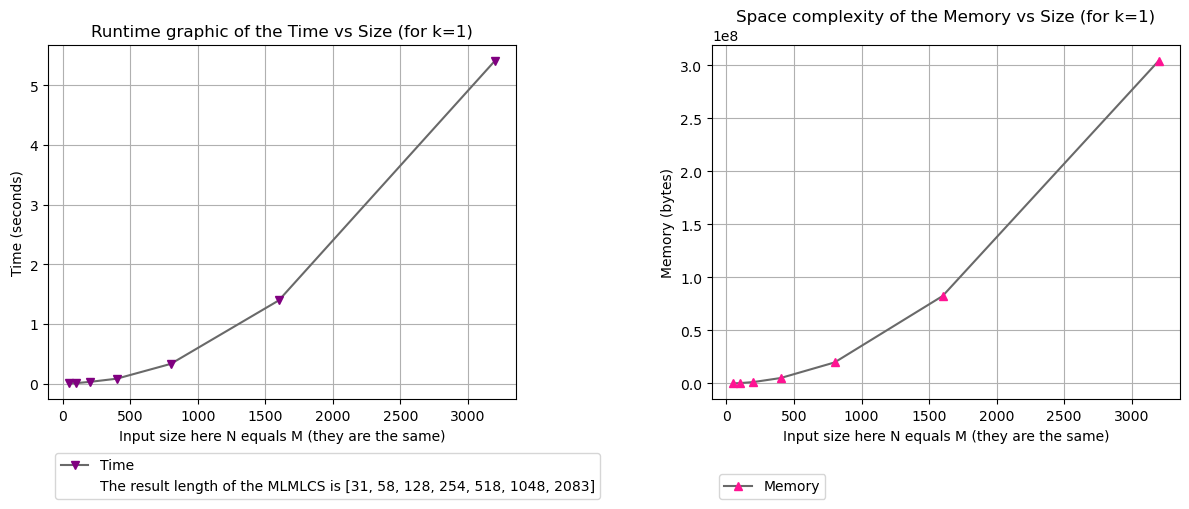

k: 2
A: tctgtgtattttaacccgtagggagatacgagattggcagtgaataaagc
MLMLCS:             aa ccg ag  ag tacg   tt  cagt  at     
B: aaccggcagaaagttaaaaacgcgctccacgccgttcatgttcttgcatt
MLMLCS: aaccg  ag  ag ta      cg          ttca gt      at 
k: 2
A: tctgtgtattttaacccgtagggagatacgagattggcagtgaataaagc
MLMLCS:             aa ccg ag  ag tacg   tt  cagt  at     
B: aaccggcagaaagttaaaaacgcgctccacgccgttcatgttcttgcatt
MLMLCS: aaccg  ag  ag ta      cg          ttca gt      at 
k: 2
A: accaagcattatttgaagtgccacccagacggtgggtaagccagctcttcgtaggccccccacggtacgatgaaggccgagatacacagtttgtgaggat
MLMLCS:  cc   catt  ttg agt ccaccca acgg gg   agcc  ct tt gt gg     ca ggt          ccg    ac      tgtgagga 
B: ggatccggttccattcgggttggttacgagtaaccacgcacgggccataaacggggagccctatttgttggacaggtccgactctgtcgagcggggggag
MLMLCS:     cc     catt    ttg      agt  ccac       cca   acggggagccct tt gt gg caggtccgac  tgt ga      gga 
k: 2
A: accaagcattatttgaagtgccacccagacggtgggtaagccagctcttcgtaggccccccacggtacgatgaaggccgagatacacagtttgtgagga

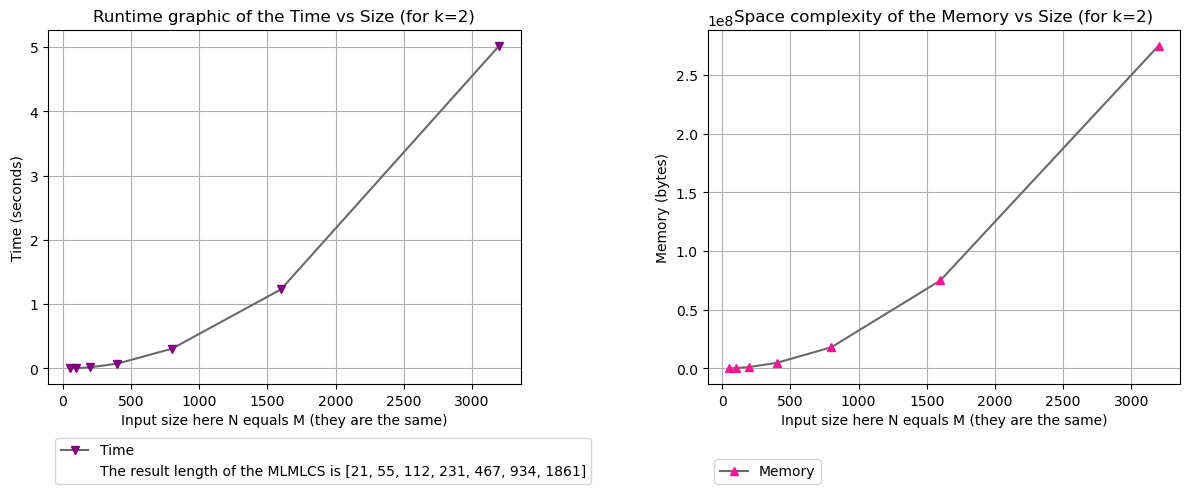

k: 3
A: ttgaactatacaaattggaaggttccggacgatctctctttccaagaggt
MLMLCS:    aac      aat      gtt cgg     ctc        agaggt
B: aacaatcagcgttcggctcacctagaggtccattaatgtatatccggcct
MLMLCS: aacaat    gttcggctc    agaggt                     
k: 3
A: ttgaactatacaaattggaaggttccggacgatctctctttccaagaggt
MLMLCS:    aac      aat      gtt cgg     ctc        agaggt
B: aacaatcagcgttcggctcacctagaggtccattaatgtatatccggcct
MLMLCS: aacaat    gttcggctc    agaggt                     
k: 3
A: gatcgagtgccaagaatcaaggtagacgtgagtttttcgaaagacactaccgtctgcggggttttaattctcggtaccggcgatgttctatcagcgcaac
MLMLCS:  atc agt  caagaa caaggt               gaa        ccg           ttaa   tcgg          gttctat agc     
B: cctcttataatctagtacctctacacctttagtctcaaggcgcggaaccaacggtcccaggaatccgcttaatcggagggttctaatatacgagccgtaa
MLMLCS:          atc agt                   caa      gaa caa ggt     gaa ccg ttaatcgg   gttc   tat   agc     
k: 3
A: gatcgagtgccaagaatcaaggtagacgtgagtttttcgaaagacactaccgtctgcggggttttaattctcggtaccggcgatgttctatcagcgcaa

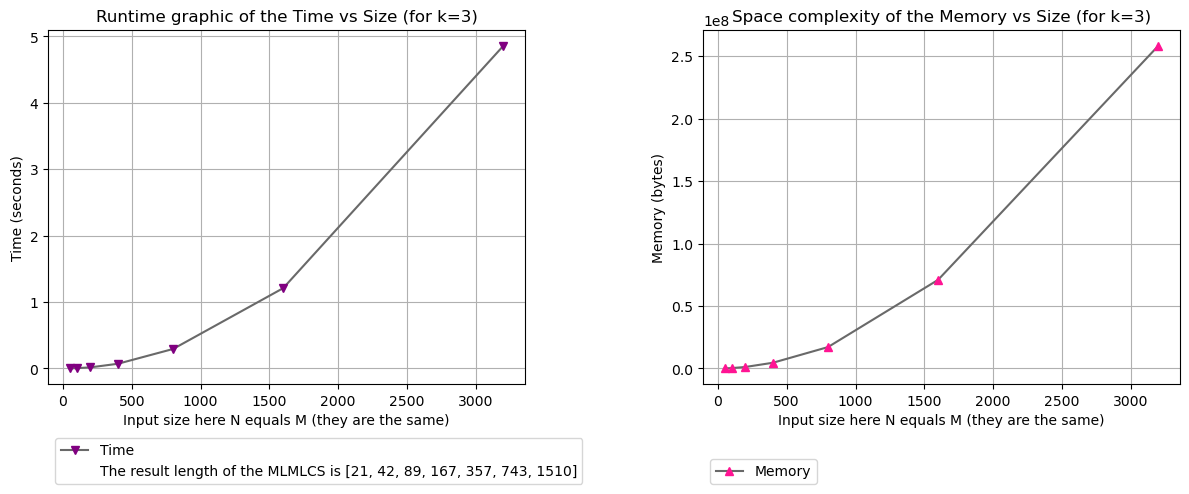

k: 4
A: gagagtatataaggcggaagtcacgtctagatatgaaacgcggcatagag
MLMLCS:            aggc   agtc         tatg               
B: tcaggcctttatagtcttacaagctattatgctgctcacccgagtgcgca
MLMLCS:   aggc      agtc           tatg                   
k: 4
A: gagagtatataaggcggaagtcacgtctagatatgaaacgcggcatagag
MLMLCS:            aggc   agtc         tatg               
B: tcaggcctttatagtcttacaagctattatgctgctcacccgagtgcgca
MLMLCS:   aggc      agtc           tatg                   
k: 4
A: aactagtcttctcagtgaggtttttaccttgcttcatattcctacgttaccgaagagcaagggaatcattgtagtcacgtcgtttttcaacgctaagttt
MLMLCS:         ttct  gtga                   attcc       ccgaa                      acgtc          gcta     
B: tttctgagcacatctgttcagttgtcacgtgacgcacaaactgttgattccgtgcggtacttccgaaacgtccgtgagctatgtaaggtaactcgagtaa
MLMLCS:  ttct                       gtga              attcc           ccgaaacgtc     gcta                   
k: 4
A: aactagtcttctcagtgaggtttttaccttgcttcatattcctacgttaccgaagagcaagggaatcattgtagtcacgtcgtttttcaacgctaagtt

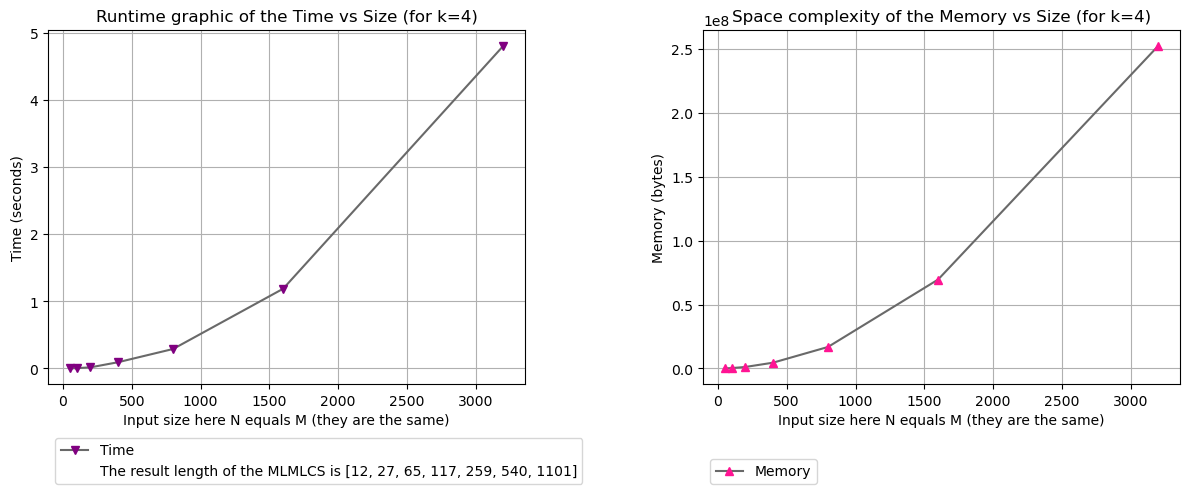

k: 5
A: cctgccagctcctagaaggtgaagaaaccttagactgacactgtccgtct
MLMLCS:                                                   
B: acgattggacaagattgattgcataaaaatattcgcattggatccacggt
MLMLCS:                                                   
k: 5
A: cctgccagctcctagaaggtgaagaaaccttagactgacactgtccgtct
MLMLCS:                                                   
B: acgattggacaagattgattgcataaaaatattcgcattggatccacggt
MLMLCS:                                                   
k: 5
A: ccagagtgatggtgtaaaaatggaggctaggtttaaacccatcctggcgtacctctcaaacagagaataggaacgtaatgccaagtcattagactatgtt
MLMLCS:                                              ggcgt                                            tatgtt
B: gcgcactaattcgcggttcgaaccttaacggaagattgatcggggcctcgaaggcggcgttgtatctgcagtccggatatgtttcatgatcgagccggga
MLMLCS:                                                        ggcgt                 tatgtt                 
k: 5
A: ccagagtgatggtgtaaaaatggaggctaggtttaaacccatcctggcgtacctctcaaacagagaataggaacgtaatgccaagtcattagactatgt

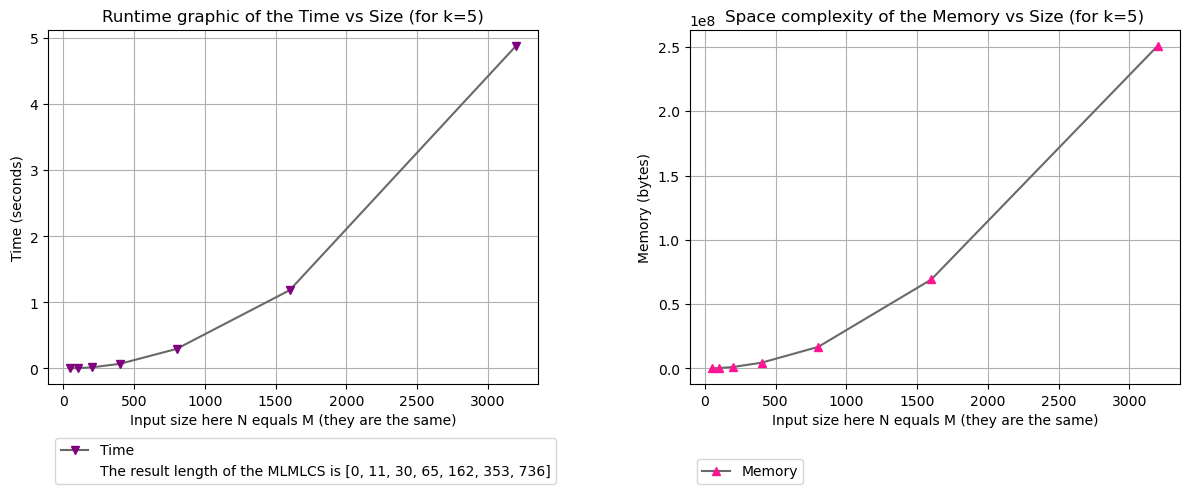

k: 6
A: tcgcgtaagatccgtcgatttcacgacagtctcttggggcccagtacata
MLMLCS:                                                   
B: gtcagttggtcctgtatccataaatctgcgtgccaactccaccgagcttg
MLMLCS:                                                   
k: 6
A: tcgcgtaagatccgtcgatttcacgacagtctcttggggcccagtacata
MLMLCS:                                                   
B: gtcagttggtcctgtatccataaatctgcgtgccaactccaccgagcttg
MLMLCS:                                                   
k: 6
A: ccgattctcatcaactgtacccagtctcacgctgttagcgccacgtttttatacccgaacgctgggtgttgaccaagcttattgcaacgggggcatcgta
MLMLCS:                                           acgttt                                             catcgta
B: cattatttaaagaagtagacgcgtcgtttcggtgacgtttcaaaggaacatcgtaaagctcgtctcaagcataatctcatcagacagacaaccttcgttg
MLMLCS:                                   acgttt        catcgta                                             
k: 6
A: ccgattctcatcaactgtacccagtctcacgctgttagcgccacgtttttatacccgaacgctgggtgttgaccaagcttattgcaacgggggcatcgt

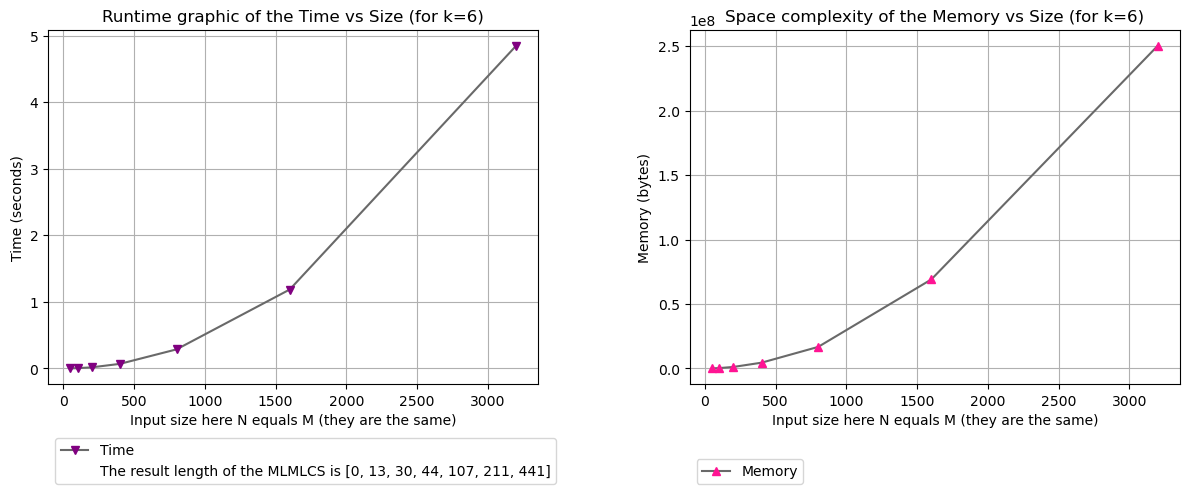

k: 7
A: catatccatttctctcccccgtgcggcaataggaccagggttttgctctt
MLMLCS:                                                   
B: acgcaagattccgaattcgataacagtagattcttgggcttcaagccgcg
MLMLCS:                                                   
k: 7
A: catatccatttctctcccccgtgcggcaataggaccagggttttgctctt
MLMLCS:                                                   
B: acgcaagattccgaattcgataacagtagattcttgggcttcaagccgcg
MLMLCS:                                                   
k: 7
A: taacgggggatgttcaaggcgcttgtatagtacgcccacgacaacgaaccaacctctaggcatgagggggtaactgccacgaccttgccaaaggacacga
MLMLCS:                                                                                    cttgccaa         
B: taattaagaagctaggcggatgaaggatcaagataatcggggaggcttgtctcatattatactcttgccaatgcctgcaccctttgacgtcctgacccgt
MLMLCS:                                                                cttgccaa                             
k: 7
A: taacgggggatgttcaaggcgcttgtatagtacgcccacgacaacgaaccaacctctaggcatgagggggtaactgccacgaccttgccaaaggacacg

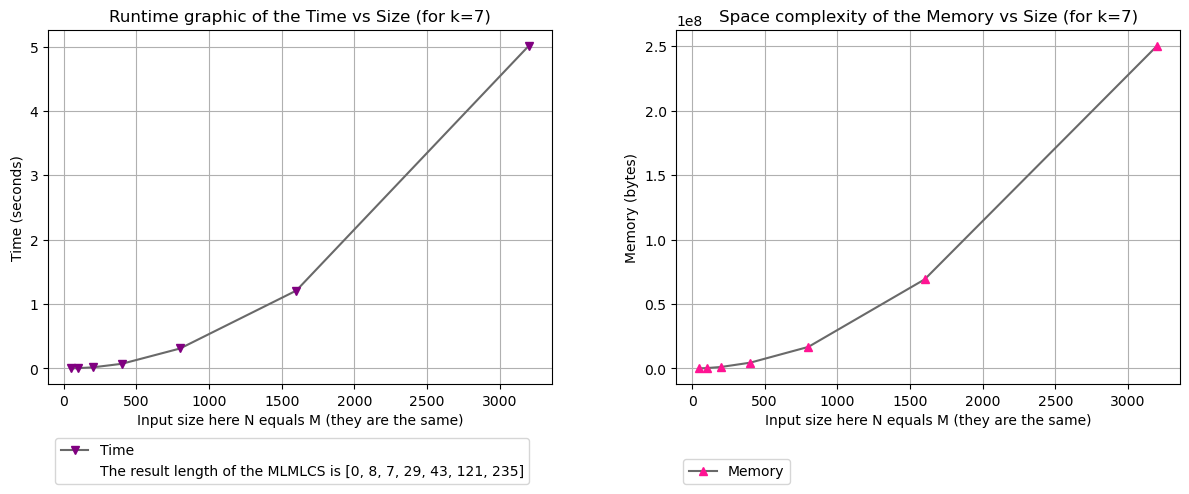

k: 8
A: gttatatgtgtgtcgaagtttaagtgtccaccgctaacaacactaactgc
MLMLCS:                                                   
B: tttatgtcccatccccacctctattaaacattaaatagacttcactgtag
MLMLCS:                                                   
k: 8
A: gttatatgtgtgtcgaagtttaagtgtccaccgctaacaacactaactgc
MLMLCS:                                                   
B: tttatgtcccatccccacctctattaaacattaaatagacttcactgtag
MLMLCS:                                                   
k: 8
A: ccctttgataaacaagctcataggaactttccgtgcccgtgcgtgatactgccagtcgagactcccatgaataacgcagcattgaattacaacctgagtg
MLMLCS:       gataaaca                                                                                      
B: ttcttggtcgagcacagtccgcttccctgatatgactaacacgcaccatcatcaacagcttcatctctgtaactcatggatgtaggaatggagataaaca
MLMLCS:                                                                                             gataaaca
k: 8
A: ccctttgataaacaagctcataggaactttccgtgcccgtgcgtgatactgccagtcgagactcccatgaataacgcagcattgaattacaacctgagt

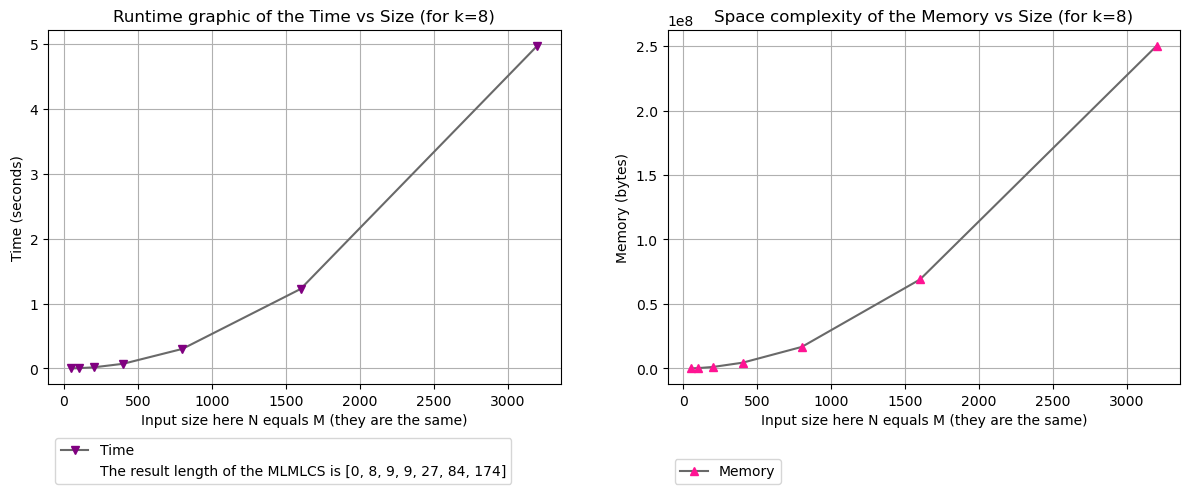

k: 9
A: gagccctctactgtacgttcggttcgtgacgttggtccacccagtgcgat
MLMLCS:                                                   
B: cattccacgctaaggcccgtagccagccgcgtagccaggcgaacaattcc
MLMLCS:                                                   
k: 9
A: gagccctctactgtacgttcggttcgtgacgttggtccacccagtgcgat
MLMLCS:                                                   
B: cattccacgctaaggcccgtagccagccgcgtagccaggcgaacaattcc
MLMLCS:                                                   
k: 9
A: ggcctcggtcggcctctcaggactgtctctttgcctaaaacagcacctacgcgatagtccccccctttggaaggtttcgttaggcatcggggtgccccaa
MLMLCS:                                                                                                     
B: tgatcaaggcccgcgtgttattttacttgtcgcaagtgaagtgtgattttatacggtcaaatcggccatctcccacgataattctagcatatcctcaggt
MLMLCS:                                                                                                     
k: 9
A: ggcctcggtcggcctctcaggactgtctctttgcctaaaacagcacctacgcgatagtccccccctttggaaggtttcgttaggcatcggggtgcccca

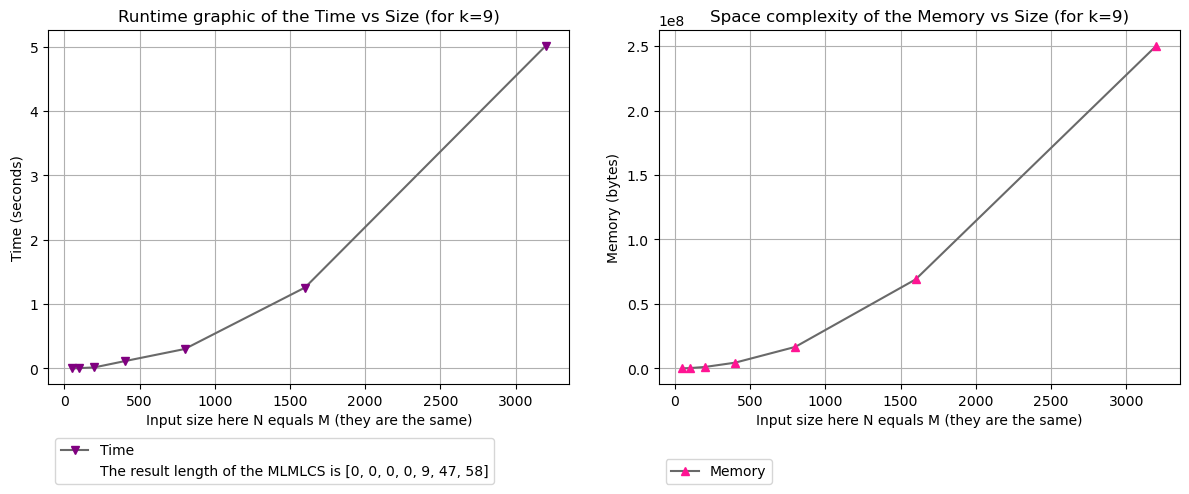

In [46]:
def make_random_dna(length_example):
    """ 
    Function which serves to produce a random string of DNA, it required the random library since the .choice() 
    method is used to "Return a random element from the non-empty sequence seq" (https://docs.python.org/3/library/random.html). 
    The non-empty sequence seq is only composed of 4 letters corresponding to the DNA basis Adenosine / Cytosine / Guanine / Thymine.
    
    Input : 
    
    - length_example : an integer of the required length of the dna sequence used for the MLMLCS examples 
    
    Output :
    
    - final_dna_string : a string of length length_example composed of only a/c/g/t generated randomly 
    """
    
    dna_letters = ['a', 'c', 'g', 't'] # the list of DNA bases 
    
    # We first initialise an empty string which will get completed with the different bases 
    final_dna_string = ""
    
    # Simple for loop with a range which corresponds to length_example
    for i in range(length_example):
        
        # here we use the .choice method to chose at random which dna base will be added to the string final_dna_string
        random_letter = random.choice(dna_letters)
        
        # Here we add the chosen letter to the end of the string we are building
        final_dna_string = final_dna_string + random_letter
        
    # Return the desired length of a dna string 
    return final_dna_string

# here are the different sizes f the strings used from the time analysis 
sizes_of_strings = [50, 100, 200, 400, 800, 1600, 3200]

# Here we run this time and space complexity analysis for values of 1 to 9 
for k in range(1, 10):
    
    time_results = [] # list on in which s the time results will be appended
    space_results = [] # list on in which s the space results will be appended
    length_results = [] # list on in which s the length of the MLMLCS results will be appended
    
    for size in sizes_of_strings: # simple for for to iterate through the values of sizes_of_strings
        A = make_random_dna(size)
        B = make_random_dna(size)
        
        # For the time measurements, the timei package is used, https://docs.python.org/3/library/time.html
        # especially the perf_counter method https://docs.python.org/3/library/time.html#time.perf_counter 
    
        start_time = time.perf_counter() # with the use of the perf_counter() method we take the time at instant t in seconds
        result = mlmlcs(A, B, k)
        how_much_s_passed = time.perf_counter() - start_time # and we just calculate he difference from the start until the end 
        time_results.append(how_much_s_passed) # append the result 
        length_results.append(len(result)) # same logic as the Examples 
        
        # For the time measurements, the tracemalloc package is used to track memory allocation 
    
        tracemalloc.start() # here we start tracking the memory allocation 
        mlmlcs(A, B, k)
        not_using, peak = tracemalloc.get_traced_memory() # here we use the get_traced_memory() method to return the current and peak memory usage since start
        tracemalloc.stop() # stop tracking 
        space_results.append(peak) # here we append the Peak memory and not the not_using which would correspond to the current memory 
    
    # The plotting is done using Matplotlib 
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))
    
    # Here this is the code for the Time vs size of the strings, in the legend shows the result 
    # for the k = the current value from 1 to 9, and the MLMLC length for the specific size 
    
    time_line, = ax1.plot(sizes_of_strings, time_results, marker = "v", markerfacecolor = "purple", markeredgecolor = "purple", color = "dimgrey"  ,label = "Time")
    length_handle = Line2D([], [], linestyle = "", label = f"The result length of the MLMLCS is {length_results}") # code for the legend 
    ax1.legend(handles=[time_line, length_handle], loc = "lower left", bbox_to_anchor = (0, -0.30))  
    ax1.set_title(f"Runtime graphic of the Time vs Size (for k={k})")
    ax1.set_xlabel("Input size here N equals M (they are the same)")
    ax1.set_ylabel("Time (seconds)")
    ax1.grid(True)
    
    # Memory vs size
    ax2.plot(sizes_of_strings, space_results, marker = "^", markerfacecolor = "deeppink", markeredgecolor = "deeppink", color = "dimgrey"  ,label = "Memory")
    ax2.legend()
    ax2.legend(loc='lower left', bbox_to_anchor=(0, -0.30))  
    ax2.set_title(f"Space complexity of the Memory vs Size (for k={k})")
    ax2.set_xlabel("Input size here N equals M (they are the same)")
    ax2.set_ylabel("Memory (bytes)")
    ax2.grid(True)
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


## What is the worst case runtime in terms of the lengths of $A$ ?

This would mean a scenario where $B$ is fixed to a value $M$ whilst $A$ would grow and becomes the overall dominant term resulting in $O(N)$ complexity, where its "linear" in terms of N for each fixed M, this can be seen in the graphic just down.

k: 3
A: agtatacggtcgactgccacatcgattacggccgtcaataagccaggggc
MLMLCS: agtatacgg  gac  ccacatc att cggccgtcaata     gggg 
B: atgtgagtccgcttatattggtagtcggggcggtagcatgcatgtacgttttcatatcggcagacaatgtttcccactttttacaagcggaatcactcctcgagagacctcgaacatggagtacaatccttgtctcattcgaagagttggcgccgcggcacctgggtcgtcgaccgtcaagctgatagatgatgcgggga
MLMLCS:      agt                                             ata cgg  gac        ccac              atc                                          att                cgg               ccgtca     ata        gggg 
k: 3
A: ataaaataagaactacatgtgtgccgccgaatctatgcgtcaaagacttgcacttcctggctaaaagtgtttgcctaaaaaggaacagcaattagtgaca
MLMLCS:     aataagaa     tgtg gccgcc  atctatgcgtcaa   cttg  cttcct  cta  agtg      taaaa gga                
B: ccgaatgcgtttgtcccaagaattgtgggatcggcccgcgttcgtttcggcttaagtctgccatcagacatgactgtacacgtatgagctttatgagaaggtatcgatacccagagggtacgttcgttcaaagcgtacaatcggttgacatcttgcttgaccctctgccgcctacagagtggtaaaaggatgtactggat
MLMLCS:    aat           aagaa tgtg      gcc   

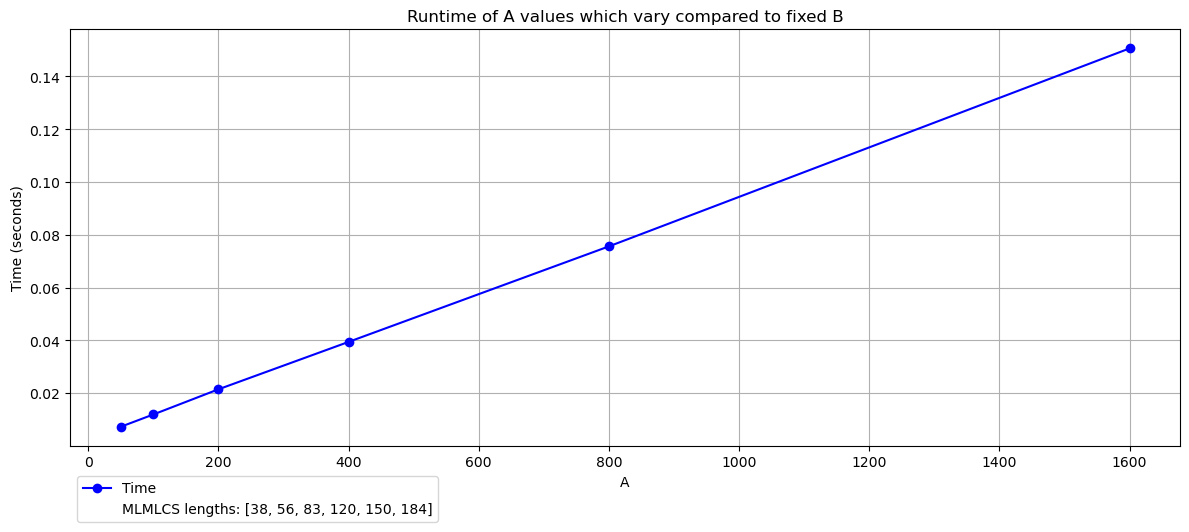

In [11]:
def make_random_dna(length_example):
    """ 
    Function which serves to produce a random string of DNA, it required the random library since the .choice() 
    method is used to "Return a random element from the non-empty sequence seq" (https://docs.python.org/3/library/random.html). 
    The non-empty sequence seq is only composed of 4 letters corresponding to the DNA basis Adenosine / Cytosine / Guanine / Thymine.
    
    Input : 
    
    - length_example : an integer of the required length of the dna sequence used for the MLMLCS examples 
    
    Output :
    
    - final_dna_string : a string of length length_example composed of only a/c/g/t generated randomly 
    """
    
    dna_letters = ['a', 'c', 'g', 't'] # the list of DNA bases 
    
    # We first initialise an empty string which will get completed with the different bases 
    final_dna_string = ""
    
    # Simple for loop with a range which corresponds to length_example
    for i in range(length_example):
        
        # here we use the .choice method to chose at random which dna base will be added to the string final_dna_string
        random_letter = random.choice(dna_letters)
        
        # Here we add the chosen letter to the end of the string we are building
        final_dna_string = final_dna_string + random_letter
        
    # Return the desired length of a dna string 
    return final_dna_string

# Here we defined a dictionnary for the results in this example 

results_A_example = {"sizes": [], "times": [], "lengths": []}

# Fixed parameters :

sizes_A = [50, 100, 200, 400, 800, 1600]

fixed_B = 200  # here B will be fixed at 200 

fixed_k = 3 # this analysis is done for k = 3 so that there won't be even more graphics

for N in sizes_A:
    
    time_results = [] # list on in which s the time results will be appended
    space_results = [] # list on in which s the space results will be appended
    length_results = [] # list on in which s the length of the MLMLCS results will be appended
    
    A = make_random_dna(N) # here will will vary A from sizes_A
    B = make_random_dna(fixed_B) # here we have the constant value of B 

    # Same logic as before 
    start_time = time.perf_counter() 
    result = mlmlcs(A, B, fixed_k) # here we also use the fixed value of k
    how_much_s_passed = time.perf_counter() - start_time # and we just calculate he difference from the start until the end 
    
    results_A_example["sizes"].append(N)
    results_A_example["times"].append(how_much_s_passed)
    results_A_example["lengths"].append(len(result))
    
    
    time_results.append(how_much_s_passed) # append the result 
    length_results.append(len(result)) # same logic as the Examples 

# Plotting using Matplotlib 

fig, ax = plt.subplots(figsize=(12, 6))

# Now plot on that single Axes:
ax.plot(results_A_example["sizes"],results_A_example["times"], marker = "o",color = "blue",label = "Time")

# for the legend 
legend_A = Line2D([], [], linestyle = "", label = f"MLMLCS lengths: {results_A_example['lengths']}")

# Add both entries to the legend, positioned below:
ax.legend(handles = [ax.lines[0], legend_A], loc = "lower left", bbox_to_anchor = (0, -0.20))

# Titles and labels:
ax.set_title("Runtime of A values which vary compared to fixed B")
ax.set_xlabel("A")
ax.set_ylabel("Time (seconds)")
ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## What is the worst case runtime in terms of the lengths of $B$ ?

Here we have same same scenario but inverted, meaning that $A$ is fixed to a value $N$ whilst $B$ grows to becomes the dominating term resulting in a $O(M)$ complexity, where its "linear" in terms of M for each fixed N, this can be seen in the graphic just down.

k: 3
A: gtcatgtcggttccccctagctgagtgcaccgattcccaacttacattcatctttgacgcactagtcgaccctattagcttcggcatgtccaagcgctcacggctcaagatactccatcgcgcgcagggccatagttaagttgcttacggtgcaaggagccattgtcgttcgcggtaagagactccgtgaggcgtcgccc
MLMLCS:     tgt ggt        gct                                          gtcga       agc  cgg      caa  gctc    ctc                                                       att              gag                   
B: gtgtggtgcgctgtcgaagccgcggtttacaatagctctctctattcgag
MLMLCS:  tgtggt  gctgtcgaagc  cgg    caa  gctc ctc att gag
k: 3
A: agaatgccttcgcttcgcacccgcaattcacttatggggggtggatagttgggagtcctatggtgaatgctagtcactgttcctagcgattccttctggacacagccgactcggggcactctgccggttgtatcgcaaataagtcttcctcactttacaacctattcaggtccgtcgcagtcgtcgcgccgcacacgcgc
MLMLCS:    atg          gca     aattcac               agt  ggagtc                      ttcc           tct  acaca                           atcgc              cacttt     ctat               tcgt      gcaca     
B: atgagcaaaattggaccctgacacgcccagtaaggccatccggacgtc

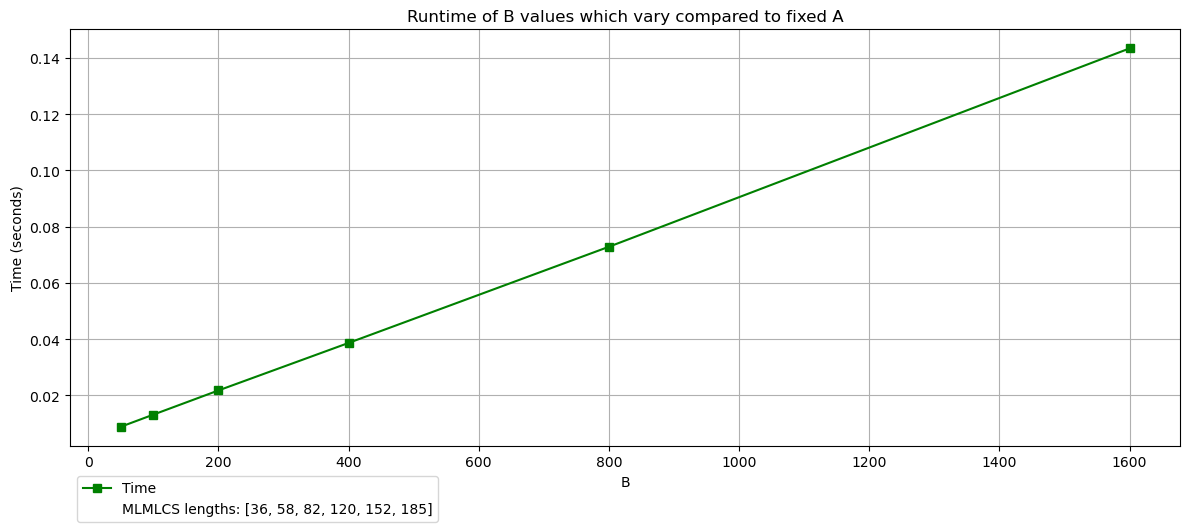

In [12]:
# same logic as the previous example just B varies and A is fixed 

def make_random_dna(length_example):
    """ 
    Function which serves to produce a random string of DNA, it required the random library since the .choice() 
    method is used to "Return a random element from the non-empty sequence seq" (https://docs.python.org/3/library/random.html). 
    The non-empty sequence seq is only composed of 4 letters corresponding to the DNA basis Adenosine / Cytosine / Guanine / Thymine.
    
    Input : 
    
    - length_example : an integer of the required length of the dna sequence used for the MLMLCS examples 
    
    Output :
    
    - final_dna_string : a string of length length_example composed of only a/c/g/t generated randomly 
    """
    
    dna_letters = ['a', 'c', 'g', 't'] # the list of DNA bases 
    
    # We first initialise an empty string which will get completed with the different bases 
    final_dna_string = ""
    
    # Simple for loop with a range which corresponds to length_example
    for i in range(length_example):
        
        # here we use the .choice method to chose at random which dna base will be added to the string final_dna_string
        random_letter = random.choice(dna_letters)
        
        # Here we add the chosen letter to the end of the string we are building
        final_dna_string = final_dna_string + random_letter
        
    # Return the desired length of a dna string 
    return final_dna_string

# Here we defined a dictionnary for the results in this example 

results_B_example = {"sizes": [], "times": [], "lengths": []}

# Fixed parameters :

sizes_B = [50, 100, 200, 400, 800, 1600]

fixed_A = 200  # here A will be fixed at 200 

fixed_k = 3 # this analysis is done for k = 3 so that there won't be even more graphics

for M in sizes_B:
    
    time_results = [] 
    space_results = [] 
    length_results = [] 
    
    A = make_random_dna(fixed_A) # here will will vary A from sizes_A
    B = make_random_dna(M) # here we have the constant value of B 

    
    start_time = time.perf_counter() 
    result = mlmlcs(A, B, fixed_k) 
    how_much_s_passed = time.perf_counter() - start_time 
    
    results_B_example["sizes"].append(M)
    results_B_example["times"].append(how_much_s_passed)
    results_B_example["lengths"].append(len(result))
    
    
    time_results.append(how_much_s_passed) # append the result 
    length_results.append(len(result)) # same logic as the Examples 

# Plotting using Matplotlib 

fig, ax = plt.subplots(figsize=(12, 6))

# Now plot on that single Axes:
ax.plot(results_B_example["sizes"],results_B_example["times"], marker = "s",color = "green",label = "Time")

# for the legend 
legend_B = Line2D([], [], linestyle = "", label = f"MLMLCS lengths: {results_B_example['lengths']}")

# Add both entries to the legend, positioned below:
ax.legend(handles = [ax.lines[0], legend_B], loc = "lower left", bbox_to_anchor = (0, -0.20))

# Titles and labels:
ax.set_title("Runtime of B values which vary compared to fixed A")
ax.set_xlabel("B")
ax.set_ylabel("Time (seconds)")
ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## What is the worst case runtime in terms of the lengths of $k$ ?

Essentially, $k$ acts as a threshold in the code `if consecutive_match_lengths[i][j] >= k:` for a "simple" yet very crucial step in the algorithm. But since he it serves to only do a "comparaison" which is done in O(1) constant time even if $k$ were to be very big we still perform an integer comparison, and for the block scenario a one constant‐time lookup and update this can be seen down below.

k: 1
A: ctttcttttacgcgtccgcccggagaattagttcgctcgactcagggctggcggcgtgaggttccggcctctaggcacaacgaacaacctgtcgcgtcaaattgccaataccacatgtggcaagatggtcaaatccgtcctcgtacatctgcagcgcacactccatacacgtagttctgagcccttacgcgcccaagcag
MLMLCS:  tt       cg gtccg  cgg g at  gttcg tcg ct agggc g  ggcg gaggttccgg   ctagg aca  gaa a cc gtcgc  ca  ttgc   tac        gc agatg t   atc  t ctcgtacatctg  gcg a ac c  ta ac ta tt tga    ttacg gcccaagc g
B: gttcggatccagacgggatcgttcaacaggtcgtcttgtagagatgccagggctaggaggttacacggactaggacaggttaagtagccgtcgccaggttagggctgacgcagatcgctatctctcggtgacatacaccttagggcggagagcctaaactaaatttgattattctcatggcctgcaatgtgcgctgtgtt
MLMLCS:  ttcgg tcc g cgggat gttc    g tcg ct   ag g  gc  gggc  ggaggtt c cgg ctaggacag   aa  a ccgtcgcca  tt   gct acgcagat g tatctctc gt acat    ct  g gcg a a ccta acta  tttgatta  c    ggcc  caa   gcg       
k: 2
A: tcgattttaccgaaacctataggctcccattctatttcagggggggggccacgtaggttcactagattgtataccgcttgggacattccgcacatatagaagccggtcgacgtctggttttaacgagcagtagcccccgcagaacgcgcggcctcctgcaa

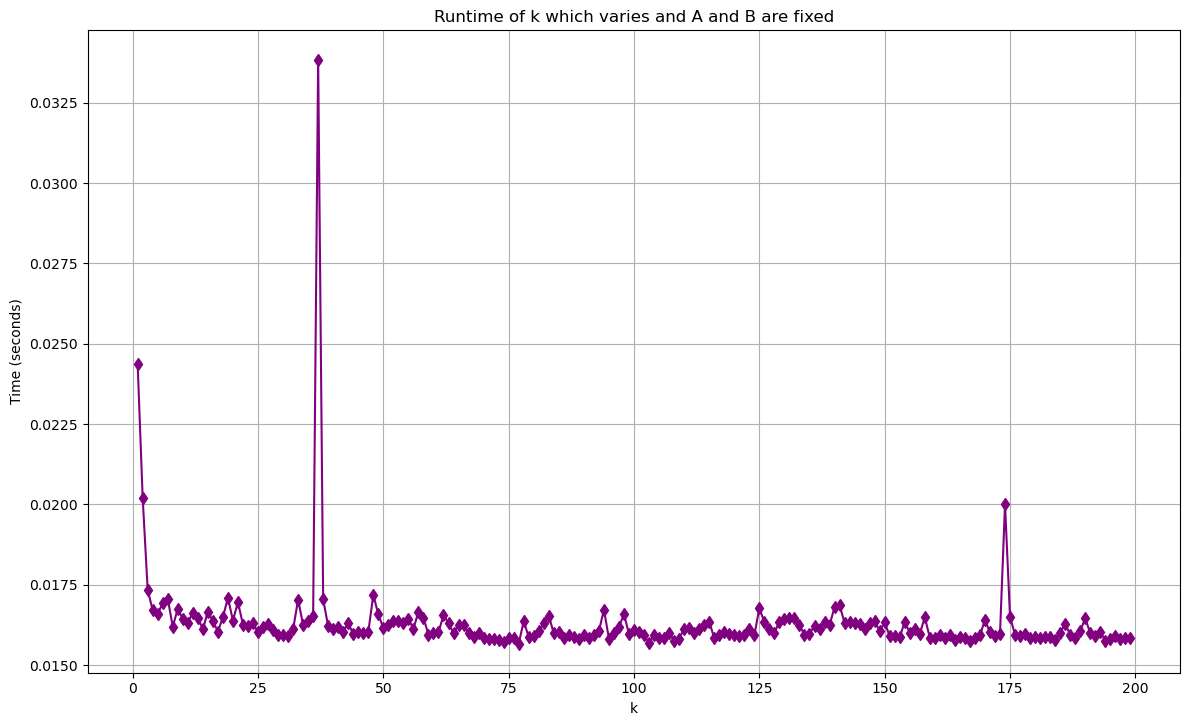

In [21]:
# here its k that will vary and not A nor B 

# same logic as the previous example just B varies and A is fixed 

def make_random_dna(length_example):
    """ 
    Function which serves to produce a random string of DNA, it required the random library since the .choice() 
    method is used to "Return a random element from the non-empty sequence seq" (https://docs.python.org/3/library/random.html). 
    The non-empty sequence seq is only composed of 4 letters corresponding to the DNA basis Adenosine / Cytosine / Guanine / Thymine.
    
    Input : 
    
    - length_example : an integer of the required length of the dna sequence used for the MLMLCS examples 
    
    Output :
    
    - final_dna_string : a string of length length_example composed of only a/c/g/t generated randomly 
    """
    
    dna_letters = ['a', 'c', 'g', 't'] # the list of DNA bases 
    
    # We first initialise an empty string which will get completed with the different bases 
    final_dna_string = ""
    
    # Simple for loop with a range which corresponds to length_example
    for i in range(length_example):
        
        # here we use the .choice method to chose at random which dna base will be added to the string final_dna_string
        random_letter = random.choice(dna_letters)
        
        # Here we add the chosen letter to the end of the string we are building
        final_dna_string = final_dna_string + random_letter
        
    # Return the desired length of a dna string 
    return final_dna_string

# Here we defined a dictionnary for the results in this example 

results_k_example = {"sizes": [], "times": [], "lengths": []}

# Fixed parameters :

fixed_A = 200  # here A will be fixed at 200 

fixed_B = 200  # here A will be fixed at 200 

k_values = list(range(1,200))

for k in k_values:
    
    time_results = [] 
    space_results = [] 
    length_results = [] 
    
    A = make_random_dna(fixed_A) # here will will vary A from sizes_A
    B = make_random_dna(fixed_B) # here we have the constant value of B 

    
    start_time = time.perf_counter() 
    result = mlmlcs(A, B, k) 
    how_much_s_passed = time.perf_counter() - start_time 
    
    results_k_example["sizes"].append(k)
    results_k_example["times"].append(how_much_s_passed)
    results_k_example["lengths"].append(len(result))
    
    
    time_results.append(how_much_s_passed) # append the result 
    length_results.append(len(result)) # same logic as the Examples 

# Plotting using Matplotlib 

fig, ax = plt.subplots(figsize=(12, 8))


ax.plot(results_k_example["sizes"],results_k_example["times"], marker = "d",color = "purple",label = "Time")

# There is not legend for this 3rd graphic, since it was too big because we are using values of k from 1 to 200

# Titles and labels:
ax.set_title("Runtime of k which varies and A and B are fixed")
ax.set_xlabel("k")
ax.set_ylabel("Time (seconds)")
ax.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


---

# Bibliography :

1. Jones NC, Pevzner PA. An Introduction to Bioinformatics Algorithms. Cambridge (MA): MIT Press; 2004. Université Virtuelle ULB for the pdf Algorithms in computational biology (INFO-F438)

2. Stanford University. Lecture 13: More dynamic programming! Longest Common Subsequences, Knapsack, and (if time) independent sets in trees. CS161: Design and Analysis of Algorithms. [Internet, accessed 29th April]. Stanford (CA): Stanford University; [cited 2025 Apr 29]. Available from: https://web.stanford.edu/class/archive/cs/cs161/cs161.1194/Lectures/Lecture13/Lecture13-compressed.pdf

3. Hernández G, Osnaya VG, Pérez-Martínez X. Conservation and Variability of the AUG Initiation Codon Context in Eukaryotes. Trends Biochem Sci. 2019 Dec;44(12):1009-1021. doi: 10.1016/j.tibs.2019.07.001. Epub 2019 Jul 25. PMID: 31353284.



---